In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential, Model
from keras.layers import  LSTM, Bidirectional, Input, Dense
import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


In [35]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)




In [36]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [37]:
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2019, 1, 1)
tesla = quandl.get('WIKI/TSLA',start_date=start,end_date=end)

In [38]:
raw_seq=tesla['Adj. Close'].values

In [39]:
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1


In [40]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [41]:
X = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [63]:
X_train[-1], y_train[-1]

(array([ 211.34,  212.01,  200.77,  197.78,  202.83]), 201.71000000000001)

In [42]:
X.shape, y_train.shape

((1555, 5, 1), (1555,))

In [43]:
# first input model
visible1 = Input(shape=(n_steps, n_features))
lstm1 = Bidirectional(LSTM(50, activation='relu'))(visible1)
out = Dense(1)(lstm1)



In [44]:
# define model
model = Model(inputs=[visible1], outputs=out)
model.compile(optimizer='adam', loss='mse')

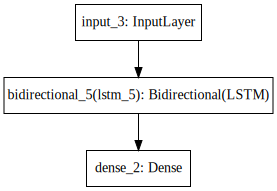

In [45]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [46]:
history=model.fit(X, y_train, epochs=500, verbose=2, validation_split=0.15, shuffle=False)

Train on 1321 samples, validate on 234 samples
Epoch 1/500
 - 3s - loss: 131.7943 - val_loss: 64.7309
Epoch 2/500
 - 0s - loss: 75.3795 - val_loss: 75.0425
Epoch 3/500
 - 0s - loss: 65.5223 - val_loss: 128.6569
Epoch 4/500
 - 0s - loss: 37.9078 - val_loss: 66.6213
Epoch 5/500
 - 0s - loss: 34.1673 - val_loss: 60.6144
Epoch 6/500
 - 0s - loss: 36.6737 - val_loss: 70.3339
Epoch 7/500
 - 0s - loss: 36.6987 - val_loss: 76.5166
Epoch 8/500
 - 0s - loss: 97.2269 - val_loss: 82.1322
Epoch 9/500
 - 0s - loss: 36.3454 - val_loss: 62.5726
Epoch 10/500
 - 0s - loss: 37.3829 - val_loss: 65.3474
Epoch 11/500
 - 0s - loss: 32.8594 - val_loss: 66.5596
Epoch 12/500
 - 0s - loss: 32.0087 - val_loss: 67.1628
Epoch 13/500
 - 0s - loss: 33.3300 - val_loss: 68.9684
Epoch 14/500
 - 0s - loss: 31.5184 - val_loss: 44.1602
Epoch 15/500
 - 0s - loss: 32.7034 - val_loss: 66.7675
Epoch 16/500
 - 0s - loss: 32.1117 - val_loss: 65.7388
Epoch 17/500
 - 0s - loss: 29.8753 - val_loss: 59.9521
Epoch 18/500
 - 0s - loss

Epoch 149/500
 - 0s - loss: 19.1832 - val_loss: 39.7165
Epoch 150/500
 - 0s - loss: 19.7192 - val_loss: 45.3719
Epoch 151/500
 - 0s - loss: 22.7009 - val_loss: 60.1939
Epoch 152/500
 - 0s - loss: 21.4595 - val_loss: 59.1921
Epoch 153/500
 - 0s - loss: 20.3558 - val_loss: 42.6616
Epoch 154/500
 - 0s - loss: 19.9914 - val_loss: 36.4892
Epoch 155/500
 - 0s - loss: 19.1898 - val_loss: 40.8347
Epoch 156/500
 - 0s - loss: 19.8576 - val_loss: 47.5754
Epoch 157/500
 - 0s - loss: 21.9413 - val_loss: 58.6490
Epoch 158/500
 - 0s - loss: 20.0538 - val_loss: 47.1385
Epoch 159/500
 - 0s - loss: 20.1182 - val_loss: 49.6024
Epoch 160/500
 - 0s - loss: 21.3557 - val_loss: 60.1123
Epoch 161/500
 - 0s - loss: 20.4986 - val_loss: 47.2329
Epoch 162/500
 - 0s - loss: 19.1174 - val_loss: 41.3553
Epoch 163/500
 - 0s - loss: 20.3729 - val_loss: 52.3561
Epoch 164/500
 - 0s - loss: 21.0622 - val_loss: 56.2194
Epoch 165/500
 - 0s - loss: 22.1290 - val_loss: 56.6377
Epoch 166/500
 - 0s - loss: 20.3784 - val_loss: 

Epoch 296/500
 - 0s - loss: 19.0567 - val_loss: 42.0732
Epoch 297/500
 - 0s - loss: 18.6994 - val_loss: 40.5834
Epoch 298/500
 - 0s - loss: 19.1451 - val_loss: 46.2305
Epoch 299/500
 - 0s - loss: 19.3856 - val_loss: 40.3337
Epoch 300/500
 - 0s - loss: 20.4590 - val_loss: 57.1349
Epoch 301/500
 - 0s - loss: 20.5759 - val_loss: 56.2040
Epoch 302/500
 - 0s - loss: 19.5203 - val_loss: 47.1664
Epoch 303/500
 - 0s - loss: 20.3425 - val_loss: 55.5497
Epoch 304/500
 - 0s - loss: 19.3383 - val_loss: 45.6817
Epoch 305/500
 - 0s - loss: 21.4631 - val_loss: 66.1376
Epoch 306/500
 - 0s - loss: 22.1482 - val_loss: 57.5085
Epoch 307/500
 - 0s - loss: 20.1089 - val_loss: 34.0850
Epoch 308/500
 - 0s - loss: 20.3399 - val_loss: 46.6974
Epoch 309/500
 - 0s - loss: 23.1561 - val_loss: 61.5944
Epoch 310/500
 - 0s - loss: 19.3284 - val_loss: 46.2705
Epoch 311/500
 - 0s - loss: 21.0694 - val_loss: 53.4249
Epoch 312/500
 - 0s - loss: 19.7221 - val_loss: 36.2273
Epoch 313/500
 - 0s - loss: 19.2294 - val_loss: 

Epoch 443/500
 - 0s - loss: 18.9518 - val_loss: 46.1124
Epoch 444/500
 - 0s - loss: 19.6845 - val_loss: 43.2156
Epoch 445/500
 - 0s - loss: 19.5555 - val_loss: 44.6149
Epoch 446/500
 - 0s - loss: 19.5896 - val_loss: 46.3816
Epoch 447/500
 - 0s - loss: 19.5879 - val_loss: 36.6848
Epoch 448/500
 - 0s - loss: 19.5453 - val_loss: 39.0333
Epoch 449/500
 - 0s - loss: 18.2387 - val_loss: 35.8857
Epoch 450/500
 - 0s - loss: 18.3920 - val_loss: 40.1965
Epoch 451/500
 - 0s - loss: 18.6329 - val_loss: 43.1859
Epoch 452/500
 - 0s - loss: 18.5482 - val_loss: 38.9442
Epoch 453/500
 - 0s - loss: 18.6513 - val_loss: 41.9569
Epoch 454/500
 - 0s - loss: 18.6215 - val_loss: 41.1728
Epoch 455/500
 - 0s - loss: 18.6226 - val_loss: 38.1109
Epoch 456/500
 - 0s - loss: 18.9664 - val_loss: 40.8067
Epoch 457/500
 - 0s - loss: 20.0519 - val_loss: 44.3494
Epoch 458/500
 - 0s - loss: 18.7042 - val_loss: 43.2446
Epoch 459/500
 - 0s - loss: 19.6783 - val_loss: 42.5863
Epoch 460/500
 - 0s - loss: 19.4103 - val_loss: 

In [47]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'LTSM_bidirectional_uni_tesla' + mytime 

In [48]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 200)

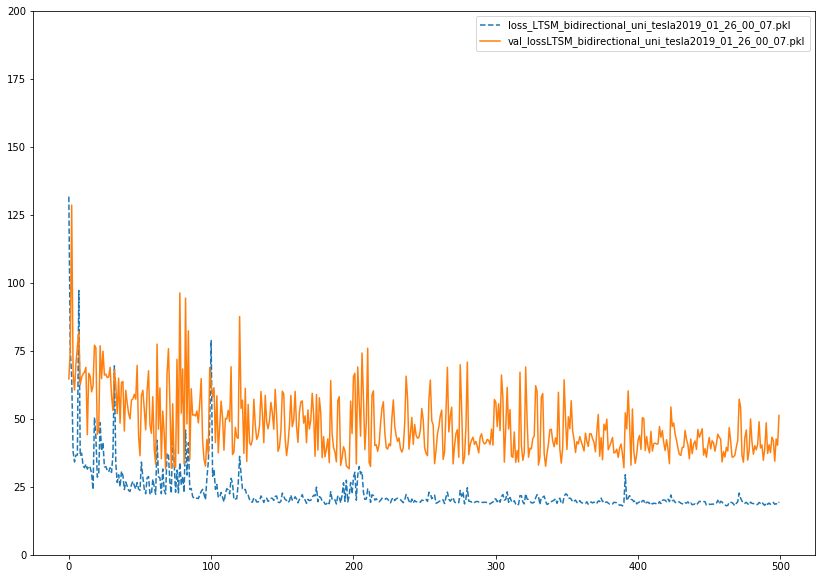

In [49]:
histories = ['LTSM_bidirectional_uni_tesla2019_01_26_00_07.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 200)

In [50]:
X_t = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [51]:
yhat = model.predict(X_t, verbose=2)

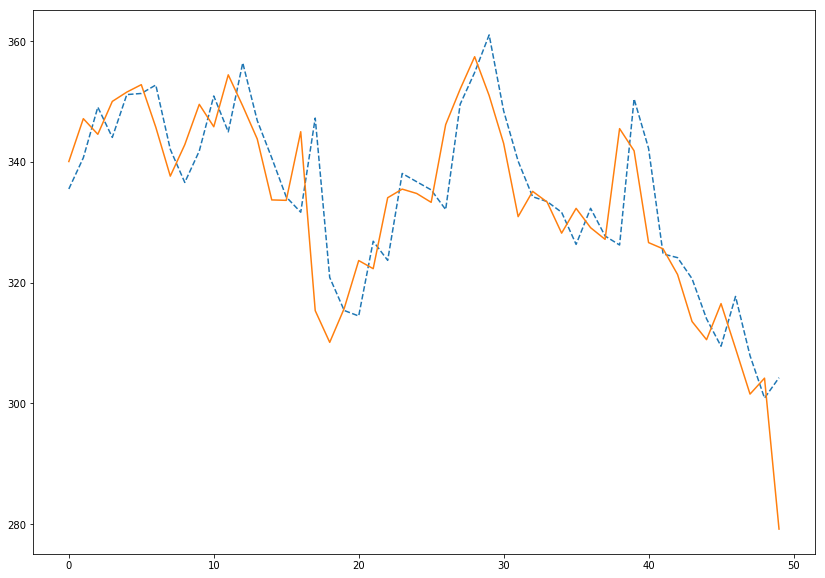

In [61]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat[-50:],label ='prediction' ,linestyle='--')
plt.plot(y_test[-50:],label='real' )

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
r2_score(y_test, yhat) 

0.98456178588383247

In [55]:
mean_squared_error(y_test, yhat) 

54.061075606619788

In [79]:
test=X_test[-5:]

In [81]:
test

array([[ 326.63,  325.6 ,  321.35,  313.56,  310.55],
       [ 325.6 ,  321.35,  313.56,  310.55,  316.53],
       [ 321.35,  313.56,  310.55,  316.53,  309.1 ],
       [ 313.56,  310.55,  316.53,  309.1 ,  301.54],
       [ 310.55,  316.53,  309.1 ,  301.54,  304.18]])

In [80]:
test.shape

(5, 5)

In [82]:
test_t = test.reshape((test.shape[0], test.shape[1], n_features))

In [83]:
y_t = model.predict(test_t, verbose=2)

In [84]:
y_t


array([[ 309.46405029],
       [ 317.71380615],
       [ 307.90628052],
       [ 300.87722778],
       [ 304.25701904]], dtype=float32)